# Unit 5 - Financial Planning

In [ ]:
"""
The following code will:

-pull in up to date (Sept 22, 2021) data for current prices of BTC, ETH, AGG, and SPY and calculate current savings based on current coins/shares held;
-calcualte progress towards emergency fund goal (3 months houshold income);
-run 3 monte carlo simualtions for retirement projections with the following data:
    -$20,000 initial investment with holdings of 40% AGG and 60% SPY and a 30 year time horizon
    -$60,000 initial investment with holdings of 20% AGG and 80% SPY and a 5 year time horizon
    -$40,000 initial investment with holdings of 30% AGG and 70% SPY and 10 year time horizon

"""

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
#import json library
import json

In [6]:
# Fetch current BTC price
requests.get(btc_url)
btc_response_data = requests.get(btc_url)
btc_response_content = btc_response_data.content
print(btc_response_content)

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18824081,\n\t\t\t"total_supply": 18824081,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 44307.0000000000000000,\n\t\t\t\t\t"volume_24h": 37409820265,\n\t\t\t\t\t"market_cap": 832560082312,\n\t\t\t\t\t"percentage_change_1h": -0.1215942137065480,\n\t\t\t\t\t"percentage_change_24h": 3.8475995019126400,\n\t\t\t\t\t"percentage_change_7d": -8.0516901095984100,\n\t\t\t\t\t"percent_change_1h": -0.1215942137065480,\n\t\t\t\t\t"percent_change_24h": 3.8475995019126400,\n\t\t\t\t\t"percent_change_7d": -8.0516901095984100\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 56593.3311,\n\t\t\t\t\t"volume_24h": 47783563424.4845,\n\t\t\t\t\t"market_cap": 1063428993137.12,\n\t\t\t\t\t"percent_change_1h": -0.1215942137065480,\n\t\t\t\t\t"percent_change_24h": 3.8475995019126400,\n\t\t\t\t\t"

In [7]:
# Format BTC data as a raw json file
btc_data = btc_response_data.json()
print(btc_data)

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18824081, 'total_supply': 18824081, 'max_supply': 21000000, 'quotes': {'USD': {'price': 44307.0, 'volume_24h': 37409820265, 'market_cap': 832560082312, 'percentage_change_1h': -0.121594213706548, 'percentage_change_24h': 3.84759950191264, 'percentage_change_7d': -8.05169010959841, 'percent_change_1h': -0.121594213706548, 'percent_change_24h': 3.84759950191264, 'percent_change_7d': -8.05169010959841}, 'CAD': {'price': 56593.3311, 'volume_24h': 47783563424.4845, 'market_cap': 1063428993137.12, 'percent_change_1h': -0.121594213706548, 'percent_change_24h': 3.84759950191264, 'percent_change_7d': -8.05169010959841}}, 'last_updated': 1632408261}}, 'metadata': {'timestamp': 1632408261, 'num_cryptocurrencies': 3105, 'error': None}}


In [8]:
# add indents to make data easier to read
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18824081,
            "total_supply": 18824081,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 44307.0,
                    "volume_24h": 37409820265,
                    "market_cap": 832560082312,
                    "percentage_change_1h": -0.121594213706548,
                    "percentage_change_24h": 3.84759950191264,
                    "percentage_change_7d": -8.05169010959841,
                    "percent_change_1h": -0.121594213706548,
                    "percent_change_24h": 3.84759950191264,
                    "percent_change_7d": -8.05169010959841
                },
                "CAD": {
                    "price": 56593.3311,
                    "volume_24h": 47783563424.4845,
                   

In [9]:
# Call curent BTC price (CDN) and print current value of BTC holdings
btc_current_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
my_btc_value = btc_current_price * my_btc
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")

The current value of your 1.2 BTC is $67912.00


In [10]:
requests.get(eth_url)
eth_response_data = requests.get(eth_url)
eth_response_content = eth_response_data.content
print(eth_response_content)


b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 117642731,\n\t\t\t"total_supply": 117642731,\n\t\t\t"max_supply": 0,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 3145.1100000000000000,\n\t\t\t\t\t"volume_24h": 23999937011,\n\t\t\t\t\t"market_cap": 369071959059,\n\t\t\t\t\t"percentage_change_1h": 0.5894103731984550,\n\t\t\t\t\t"percentage_change_24h": 6.4062980145400700,\n\t\t\t\t\t"percentage_change_7d": -12.5377451707515000,\n\t\t\t\t\t"percent_change_1h": 0.5894103731984550,\n\t\t\t\t\t"percent_change_24h": 6.4062980145400700,\n\t\t\t\t\t"percent_change_7d": -12.5377451707515000\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 4017.249003,\n\t\t\t\t\t"volume_24h": 30655119544.1503,\n\t\t\t\t\t"market_cap": 471415613306.061,\n\t\t\t\t\t"percent_change_1h": 0.5894103731984550,\n\t\t\t\t\t"percent_change_24h": 6.4062980145400700,\n\t\t\t\t\

In [11]:
eth_data = eth_response_data.json()
print(eth_data)

{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 117642731, 'total_supply': 117642731, 'max_supply': 0, 'quotes': {'USD': {'price': 3145.11, 'volume_24h': 23999937011, 'market_cap': 369071959059, 'percentage_change_1h': 0.589410373198455, 'percentage_change_24h': 6.40629801454007, 'percentage_change_7d': -12.5377451707515, 'percent_change_1h': 0.589410373198455, 'percent_change_24h': 6.40629801454007, 'percent_change_7d': -12.5377451707515}, 'CAD': {'price': 4017.249003, 'volume_24h': 30655119544.1503, 'market_cap': 471415613306.061, 'percent_change_1h': 0.589410373198455, 'percent_change_24h': 6.40629801454007, 'percent_change_7d': -12.5377451707515}}, 'last_updated': 1632408255}}, 'metadata': {'timestamp': 1632408255, 'num_cryptocurrencies': 3105, 'error': None}}


In [12]:
# add indents to make data easier to read
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 117642731,
            "total_supply": 117642731,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3145.11,
                    "volume_24h": 23999937011,
                    "market_cap": 369071959059,
                    "percentage_change_1h": 0.589410373198455,
                    "percentage_change_24h": 6.40629801454007,
                    "percentage_change_7d": -12.5377451707515,
                    "percent_change_1h": 0.589410373198455,
                    "percent_change_24h": 6.40629801454007,
                    "percent_change_7d": -12.5377451707515
                },
                "CAD": {
                    "price": 4017.249003,
                    "volume_24h": 30655119544.1503,
                 

In [13]:
# Call curent BTC price (CDN) and print current value of BTC holdings
eth_current_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
my_eth_value = eth_current_price * my_eth
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 5.3 ETH is $21291.42


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [14]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [15]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [16]:
# Format current date as ISO format
today = pd.Timestamp("2021-09-22", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!


df_my_portfolio = alpaca.get_barset(
     tickers,
    timeframe,
    limit = 1000
).df

# Preview DataFrame
df_my_portfolio

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-10-04 00:00:00-04:00  109.56  109.570  109.4100  109.500  2130907   
2017-10-05 00:00:00-04:00  109.54  109.540  109.3701  109.440  1586971   
2017-10-06 00:00:00-04:00  109.22  109.420  109.1499  109.290  1587251   
2017-10-09 00:00:00-04:00  109.35  109.420  109.3146  109.400  1000706   
2017-10-10 00:00:00-04:00  109.47  109.610  109.3999  109.430  1502645   
...                           ...      ...       ...      ...      ...   
2021-09-17 00:00:00-04:00  115.80  115.875  115.7428  115.850  4662040   
2021-09-20 00:00:00-04:00  116.02  116.170  115.9750  116.120  4463038   
2021-09-21 00:00:00-04:00  116.13  116.170  116.0450  116.135  4455403   
2021-09-22 00:00:00-04:00  116.11  116.250  116.0050  116.190  6079965   
2021-09-23 00:00:00-04:00  115.93  115.940  115.7750  115.795  1858340   

                              SPY                                      
                             open    high      low   close     volume  
time                                                                   
2017-10-04 00:00:00-04:00  252.69  253.44  252.560  253.16   30217246  
2017-10-05 00:00:00-04:00  253.51  254.68  253.400  254.64   45350955  
2017-10-06 00:00:00-04:00  254.15  254.46  253.850  254.40   40706912  
2017-10-09 00:00:00-04:00  254.63  254.70  253.650  253.96   23554888  
2017-10-10 00:00:00-04:00  254.62  255.05  253.980  254.60   28248210  
...                           ...     ...      ...     ...        ...  
2021-09-17 00:00:00-04:00  444.92  445.37  441.020  441.41  100861596  
2021-09-20 00:00:00-04:00  434.88  436.56  428.860  434.07  149948277  
2021-09-21 00:00:00-04:00  436.53  437.91  433.070  433.67   82418070  
2021-09-22 00:00:00-04:00  436.05  440.03  433.747  437.83   91135278  
2021-09-23 00:00:00-04:00  439.84  443.64  439.600  442.96   21044206  

[1000 rows x 10 columns]

In [17]:
# Pick AGG and SPY close prices
agg_close_price = df_my_portfolio["AGG"]["close"][-1]
spy_close_price = df_my_portfolio["SPY"]["close"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.795
Current SPY closing price: $442.96


In [18]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22148.00
The current value of your 200 AGG shares is $23159.00


### Savings Health Analysis

In [19]:
# Set monthly household income
monthly_household_income = 12000

# Consolidate financial assets data
crypto_value = (my_btc_value + my_eth_value)
my_crypto_value = round(crypto_value, 2)
share_value = my_agg_value + my_spy_value
my_share_value = round(share_value, 2)
# Create savings DataFrame
savings_data = {
    "amount":[my_crypto_value,my_share_value]
}
index = ["crypto", "shares"]
df_savings = pd.DataFrame(savings_data, index=index)

# Display savings DataFrame
display(df_savings)
#print(my_share_value)

,amount
crypto,89203.42
shares,45307.00


array([<AxesSubplot:ylabel='amount'>], dtype=object)

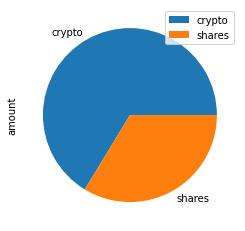

In [20]:
# Plot savings pie chart
df_savings.plot(kind="pie", subplots=True)

In [21]:
# Set ideal emergency fund
emergency_fund = monthly_household_income * 3

# Calculate total amount of savings
total_savings = my_crypto_value + my_share_value
shortfall_or_surplus = round((total_savings - emergency_fund),2)

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have surplus emergency savings of ${shortfall_or_surplus} ")
elif total_savings == emergency_fund:
    print("Congratulations, you have sufficient emergency savings!")
elif total_savings < emergency_fund:
    print(f"Save an additional ${shortfall_or_surplus} to build up your emergency fund")

Congratulations! You have surplus emergency savings of $98510.42 


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [22]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-09-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-22', tz='America/New_York').isoformat()

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
start = pd.Timestamp("2016-09-22", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-09-22", tz="America/New_York").isoformat()
df_stock_data = alpaca.get_barset(
     tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df
# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2017-10-03 00:00:00-04:00  109.46  109.54  109.4000  109.52  2243369  252.46   
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907  252.69   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971  253.51   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251  254.15   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706  254.63   

                                                             
                             high     low   close    volume  
time                                                         
2017-10-03 00:00:00-04:00  252.89  252.23  252.85  33875099  
2017-10-04 00:00:00-04:00  253.44  252.56  253.16  30217246  
2017-10-05 00:00:00-04:00  254.68  253.40  254.64  45350955  
2017-10-06 00:00:00-04:00  254.46  253.85  254.40  40706912  
2017-10-09 00:00:00-04:00  254.70  253.65  253.96  23554888

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_of_sims = 500
weights = [0.4, 0.6]

MC_30_years = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_of_sims,
    weights = weights,
    num_trading_days = 252 * 30
)

In [25]:
# Printing the simulation input data
MC_30_years.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2017-10-03 00:00:00-04:00  109.46  109.54  109.4000  109.52  2243369   
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-10-03 00:00:00-04:00          NaN  252.46  252.89  252.23  252.85   
2017-10-04 00:00:00-04:00    -0.000183  252.69  253.44  252.56  253.16   
2017-10-05 00:00:00-04:00    -0.000548  253.51  254.68  253.40  254.64   
2017-10-06 00:00:00-04:00    -0.001371  254.15  254.46  253.85  254.40   
2017-10-09 00:00:00-04:00     0.001006  254.63  254.70  253.65  253.96   

                                                  
                             volume daily_return  
time                                              
2017-10-03 00:00:00-04:00  33875099          NaN  
2017-10-04 00:00:00-04:00  30217246     0.001226  
2017-10-05 00:00:00-04:00  45350955     0.005846  
2017-10-06 00:00:00-04:00  40706912    -0.000943  
2017-10-09 00:00:00-04:00  23554888    -0.001730

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999253,0.995928,0.998290,0.989129,0.994202,0.985491,1.008592,1.011500,1.010353,1.002565,...,0.995325,0.999536,0.990850,1.011804,0.986413,1.003319,0.994188,1.018060,0.986422,0.996397
2,0.995440,0.999217,0.990825,0.982170,0.994745,0.988797,1.000721,1.009299,1.008834,1.002741,...,0.988378,0.999709,0.989372,1.015758,0.982087,0.996858,1.001799,1.033180,0.999495,1.007166
3,0.975189,0.999855,0.994937,0.984346,0.992640,0.982148,1.003700,1.013542,1.016070,1.002121,...,0.981464,1.001148,0.998905,1.021753,0.975336,1.005043,1.016590,1.028472,1.003553,1.008192
4,0.977952,1.015688,0.988721,0.984208,0.990898,0.979960,1.010792,1.005894,1.019272,1.005337,...,0.975899,0.998699,1.005054,1.028252,0.964912,1.000578,1.016660,1.022060,1.008038,1.020220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.289616,11.850989,12.784657,18.038255,2.799898,9.628928,6.749832,6.325020,24.908770,23.207200,...,14.684218,9.451531,66.733436,19.632506,29.737776,38.805606,10.864355,30.682661,12.085129,7.529708
7557,14.133111,11.832144,12.739103,18.125243,2.791421,9.597700,6.724420,6.428561,25.080001,23.221813,...,14.788116,9.404820,65.938011,19.641519,29.704367,39.430373,10.835684,31.162572,12.106707,7.444800
7558,14.016773,11.910533,12.641605,18.280066,2.770963,9.615685,6.640810,6.401874,24.655365,23.219290,...,14.965969,9.397055,66.486454,19.755830,29.989033,39.697048,10.850453,31.239996,12.191526,7.446615
7559,14.235561,11.805715,12.696125,18.238529,2.769978,9.584498,6.680791,6.401643,24.716642,23.428547,...,14.845740,9.275423,66.143836,19.854942,29.983113,39.539860,10.814900,31.061842,12.230746,7.350244


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

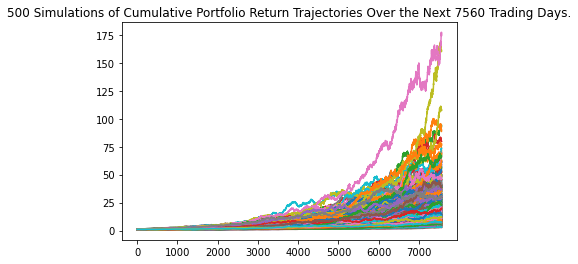

In [27]:
# Plot simulation outcomes
MC_30_years.plot_simulation()

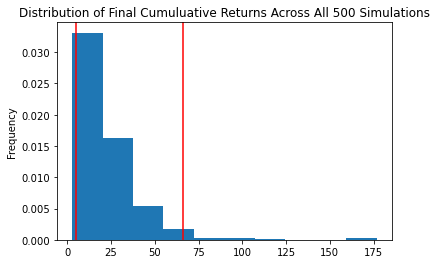

In [28]:
# Plot probability distribution and confidence intervals
dist_plot_30_year = MC_30_years.plot_distribution()

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics = MC_30_years.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics)

count           500.000000
mean             22.136274
std              17.868091
min               2.749451
25%              10.787692
50%              17.351803
75%              27.848308
max             176.660182
95% CI Lower      4.713927
95% CI Upper     66.141740
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(initial_investment * summary_statistics["95% CI Lower"], 2)
ci_upper = round(initial_investment * summary_statistics["95% CI Upper"], 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $94278.54 and $1322834.81


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_2 = round(initial_investment_2 * summary_statistics["95% CI Lower"], 2)
ci_upper_2 = round(initial_investment_2 * summary_statistics["95% CI Upper"], 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_2} and ${ci_upper_2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $141417.81 and $1984252.21


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns, increasing equity exposure from 60% to 80%
num_of_sims = 500
weights_5_year = [0.2, 0.8]

MC_5_years = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_of_sims,
    weights = weights_5_year,
    num_trading_days = 252 * 5
)

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.984534,0.993900,0.988255,1.012606,1.013592,1.005092,1.008502,0.990811,0.989242,0.997610,...,1.017048,1.008199,1.007696,0.992944,1.010319,0.997457,1.005809,0.985879,0.986846,0.991585
2,0.982610,0.998502,0.988335,0.995009,1.008152,1.001456,1.012296,0.993233,0.980439,0.990135,...,1.007112,1.014528,1.003952,0.979783,1.012687,0.995690,1.002752,0.984811,0.996147,0.980698
3,0.983202,1.002286,0.974355,0.988394,1.014856,1.008267,1.023884,0.988652,0.979239,0.969105,...,1.022525,1.024254,1.010337,0.994975,1.009851,0.990084,0.996337,1.001044,1.002612,0.999412
4,0.978799,0.990305,0.964931,0.999981,1.035861,0.975832,1.023555,0.985292,0.990713,0.948479,...,1.025357,1.011628,1.008854,1.013007,1.019472,0.970103,1.007691,0.994491,0.998160,0.987152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.418971,1.526707,2.697046,1.558131,2.772640,1.359251,1.431855,1.623471,2.299915,1.463832,...,0.829780,0.900325,1.530681,1.170054,1.909167,1.256797,1.496582,2.119651,2.411629,2.134096
1257,2.423863,1.545703,2.685990,1.562431,2.794642,1.349313,1.399219,1.658042,2.298313,1.482447,...,0.835399,0.908092,1.535333,1.188680,1.889867,1.252523,1.494883,2.132074,2.426731,2.117306
1258,2.419952,1.539452,2.665501,1.561544,2.820911,1.334097,1.397487,1.691706,2.351717,1.491016,...,0.840723,0.894709,1.532544,1.189751,1.919878,1.233914,1.498439,2.072343,2.364211,2.097504
1259,2.399223,1.532033,2.645056,1.584508,2.810993,1.315384,1.407639,1.698224,2.372005,1.472712,...,0.836458,0.898010,1.524643,1.185102,1.918770,1.235301,1.506062,2.015780,2.347127,2.092637


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

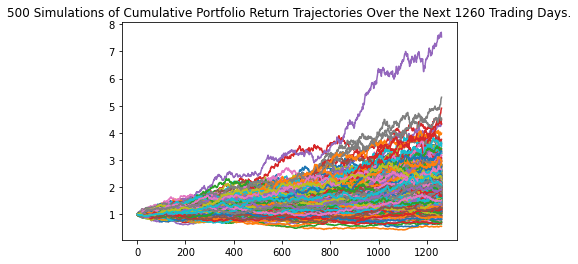

In [34]:
# Plot simulation outcomes
MC_5_years.plot_simulation()

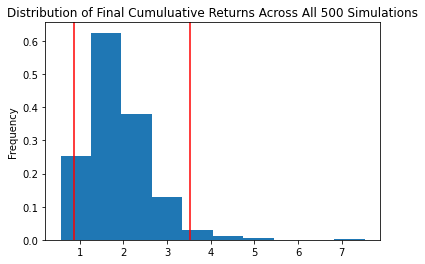

In [35]:
# Plot probability distribution and confidence intervals
dist_plot_5_year = MC_5_years.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics_5_year = MC_5_years.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_5_year)

count           500.000000
mean              1.876267
std               0.738067
min               0.560715
25%               1.352727
50%               1.753031
75%               2.213396
max               7.531162
95% CI Lower      0.867422
95% CI Upper      3.533878
Name: 1260, dtype: float64


In [38]:
# Set initial investment, increase intial investment to 60000
initial_investment_5_year = 60000 

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5_year = round(initial_investment_5_year * summary_statistics_5_year["95% CI Lower"], 2)
ci_upper_5_year = round(initial_investment_5_year * summary_statistics_5_year["95% CI Upper"], 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5_year} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5_year} and ${ci_upper_5_year}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $52045.32 and $212032.67


### Ten Years Retirement Option

In [39]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns,increasing equity exposure from intial 60% to 70%
num_of_sims = 500
weights_10_year = [0.3, 0.7]

MC_10_years = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_of_sims,
    weights = weights_10_year,
    num_trading_days = 252 * 10
)

In [40]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996195,0.998054,0.988900,1.009714,1.012773,0.982332,1.000035,1.015659,1.002241,0.984518,...,0.999870,1.001885,1.009873,0.998059,0.992625,1.003517,0.999676,0.976411,1.002436,1.006789
2,0.990384,0.996086,1.000059,1.013003,1.014764,0.994424,1.002478,1.024596,1.011973,0.970527,...,1.024078,0.996273,1.007002,0.993143,0.986509,0.994380,0.983729,0.983374,1.001164,1.012476
3,0.981021,0.993107,0.995744,1.004180,1.016176,0.993478,1.022600,1.015852,1.011770,0.983902,...,1.026432,1.002314,1.016470,0.972035,0.995120,0.996912,0.990466,0.988246,0.985672,1.025019
4,0.964203,0.985729,0.988517,1.006558,1.011546,0.993939,1.033445,1.014431,1.010140,0.993631,...,1.022888,1.001650,1.017633,0.971429,0.998108,0.985543,0.997171,0.991271,0.987144,1.026878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.029985,4.028164,2.268900,4.838649,3.568751,2.416708,4.283179,5.822114,3.682110,1.714350,...,1.922581,5.575580,2.459535,2.496674,6.804236,1.898065,2.754577,3.884812,2.276753,2.937938
2517,1.043405,4.044002,2.283189,4.880259,3.536773,2.404944,4.261438,5.847937,3.696545,1.697206,...,1.941793,5.608835,2.485980,2.530878,6.769264,1.894476,2.760728,3.919019,2.286301,2.939653
2518,1.052647,4.056989,2.262160,4.847400,3.527731,2.397174,4.300711,5.854986,3.715320,1.705073,...,1.942534,5.638217,2.483215,2.544541,6.759965,1.911536,2.712366,3.943518,2.332367,2.980142
2519,1.047423,4.050166,2.243936,4.831987,3.491602,2.408679,4.232838,5.830786,3.712781,1.721302,...,1.914341,5.622990,2.494481,2.540665,6.755636,1.906469,2.704328,4.045825,2.321145,2.966430


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

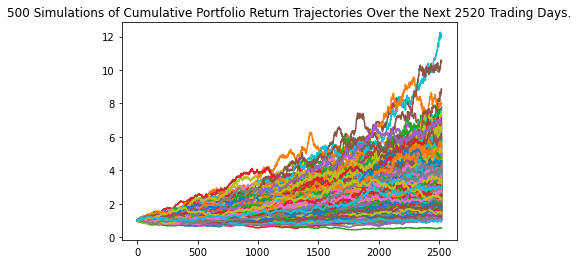

In [41]:
# Plot simulation outcomes
MC_10_years.plot_simulation()

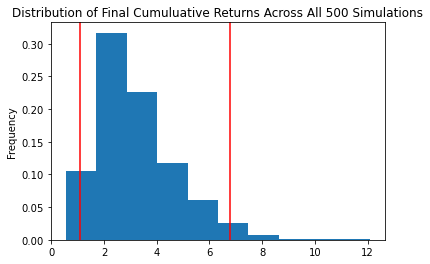

In [42]:
# Plot probability distribution and confidence intervals
dist_plot_10_year = MC_10_years.plot_distribution()

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics_10_year = MC_10_years.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_10_year)

count           500.000000
mean              3.249866
std               1.546466
min               0.550233
25%               2.157371
50%               2.897258
75%               4.006485
max              12.095422
95% CI Lower      1.089255
95% CI Upper      6.797079
Name: 2520, dtype: float64


In [44]:
# Set initial investment, adjusted to $40,000
initial_investment_10_year = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10_year = round(initial_investment_10_year * summary_statistics_10_year["95% CI Lower"], 2)
ci_upper_10_year = round(initial_investment_10_year * summary_statistics_10_year["95% CI Upper"], 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10_year} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10_year} and ${ci_upper_10_year}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $43570.21 and $271883.18
